In [1]:
import pandas as pd

evi = pd.read_csv('../data/satdata/evi.csv', parse_dates=[0], index_col=[0]).interpolate()
stemp = pd.read_csv('../data/satdata/stemp.csv', parse_dates=[0], index_col=[0]).interpolate()
df = pd.concat([evi, stemp], axis=1, keys=["evi", "stemp"])
display(df.head(2))
df_year = df.groupby(df.index.year).mean()
df_year = df_year.interpolate()
display(df_year.head(2))
df_res = df_year.unstack().reset_index()
df_res.columns = ['type', 'buurt', 'year', 'value']
df_res = df_res.pivot_table(index=['year','buurt'], columns=['type'], values='value').reset_index()
df_res

evi                                                     \
             Valkenberg      ChassÃ©   Fellenoord Schorsmolen      Station   
2000-02-18  1022.358209  1135.790323  1045.666667  841.133333  1078.019608   
2000-02-19  1028.309701  1133.202621  1061.366667  845.626389  1076.549020   

                                                                              \
                  City      Belcrum Doornbos-Linie     Biesdonk  Geeren-zuid   
2000-02-18  927.623188  1179.282353    1677.072115  1901.598425  1897.204918   
2000-02-19  924.116848  1181.397059    1651.535156  1903.628445  1867.666496   

            ... stemp                                               \
            ... Bavel Nieuw Wolfslaar Buitengebied Bavel Ulvenhout   
2000-02-18  ...   NaN             NaN                NaN       NaN   
2000-02-19  ...   NaN             NaN                NaN       NaN   

                                                                        \
           Buitengebied Ulvenhout Prinsenbeek Buitengebied Prinsenbeek   
2000-02-18                    NaN         NaN                      NaN   
2000-02-19                    NaN         NaN                      NaN   

                                                           
           Teteringen Vuchtpolder Buitengebied Teteringen  
2000-02-18        NaN         NaN                     NaN  
2000-02-19        NaN         NaN                     NaN  

[2 rows x 112 columns]

evi                                                      \
       Valkenberg      ChassÃ©   Fellenoord  Schorsmolen      Station   
2000  1719.851236  1538.745293  1784.676211  1309.249362  1516.336130   
2001  1582.650099  1355.064653  1496.668618  1144.574252  1368.361329   

                                                                         ...  \
             City      Belcrum Doornbos-Linie     Biesdonk  Geeren-zuid  ...   
2000  1324.835234  1595.024378    2239.750977  2435.553169  2548.164754  ...   
2001  1255.303424  1469.938677    2101.844901  2218.776762  2434.474249  ...   

          stemp                                                \
          Bavel Nieuw Wolfslaar Buitengebied Bavel  Ulvenhout   
2000  17.398520       17.521378          16.420216  16.239587   
2001  14.029446       14.243935          13.319293  13.128831   

                                                                             \
     Buitengebied Ulvenhout Prinsenbeek Buitengebied Prinsenbeek Teteringen   
2000              15.554192   17.305785                15.749605  16.725126   
2001              12.963569   14.822588                13.708057  14.683914   

                                          
     Vuchtpolder Buitengebied Teteringen  
2000   16.114965               15.961747  
2001   13.855749               13.904933  

[2 rows x 112 columns]

type,year,buurt,evi,stemp
0,2000,Bavel,3157.791956,17.398520
1,2000,Belcrum,1595.024378,19.880682
2,2000,Biesdonk,2435.553169,19.686129
3,2000,Blauwe Kei,2269.279876,18.073679
4,2000,Boeimeer,2485.725604,18.470505
...,...,...,...,...
1115,2019,Waterdonken,2587.089106,16.832713
1116,2019,Westerpark,2466.443015,17.618373
1117,2019,Wisselaar,2788.838927,17.476219
1118,2019,Ypelaar,2792.848919,17.029251


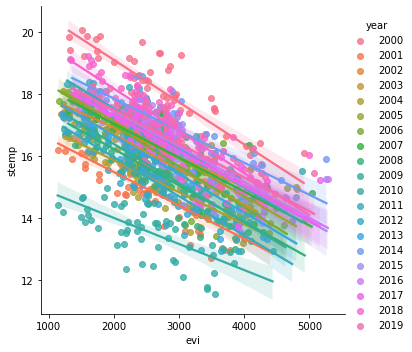

In [51]:
import seaborn as sns

sns.lmplot("evi", "stemp", data=df_res, hue="year", truncate=True)

In [43]:
df_res.stemp.groupby(pd.qcut(df_res.evi, 10)).mean()

evi
(1137.974, 1648.235]    17.249689
(1648.235, 2083.257]    17.113573
(2083.257, 2286.143]    16.453829
(2286.143, 2431.555]    16.613100
(2431.555, 2624.234]    16.367776
(2624.234, 2793.207]    16.122400
(2793.207, 3015.395]    16.235460
(3015.395, 3376.624]    15.181956
(3376.624, 3887.947]    14.723392
(3887.947, 5283.303]    14.684620
Name: stemp, dtype: float64

In [47]:
from statsmodels.formula.api import ols

fit = ols("stemp ~ evi + C(year) ", data=df_res).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stemp   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:52:56   Log-Likelihood:                -1023.4
No. Observations:                1120   AIC:                             2089.
Df Residuals:                    1099   BIC:                             2194.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.2613      0.104    204.737      0.000      21.058      21.465
C(year)[T.2001]    -3.4056      0.115    -29.550      0.000      -3.632      -3.179
C(year)[T.2002]    -1.8638      0.115    -16.190      0.000      -2.090      -1.638
C(year)[T.2003]    -2.2239      0.115    -19.267      0.000      -2.450      -1.997
C(year)[T.2004]    -2.9878      0.115    -25.944      0.000      -3.214      -2.762
C(year)[T.2005]    -1.8464      0.115    -16.035      0.000      -2.072      -1.620
C(year)[T.2006]    -2.0386      0.115    -17.690      0.000      -2.265      -1.812
C(year)[T.2007]    -1.8409      0.115    -15.991      0.000      -2.067      -1.615
C(year)[T.2008]    -2.7230      0.115    -23.650      0.000      -2.949      -2.497
C(year)[T.2009]    -2.6124      0.115    -22.677      0.000      -2.838      -2.386
C(year)[T.2010]    -4.7839      0.115    -41.461      0.000      -5.010      -4.557
C(year)[T.2011]    -1.4830      0.115    -12.877      0.000      -1.709      -1.257
C(year)[T.2012]    -3.0382      0.115    -26.371      0.000      -3.264      -2.812
C(year)[T.2013]    -2.3363      0.115    -20.282      0.000      -2.562      -2.110
C(year)[T.2014]    -0.9723      0.115     -8.446      0.000      -1.198      -0.746
C(year)[T.2015]    -1.6220      0.115    -14.088      0.000      -1.848      -1.396
C(year)[T.2016]    -1.4791      0.115    -12.848      0.000      -1.705      -1.253
C(year)[T.2017]    -1.6054      0.115    -13.946      0.000      -1.831      -1.380
C(year)[T.2018]    -0.9004      0.115     -7.819      0.000      -1.126      -0.674
C(year)[T.2019]    -1.3921      0.115    -12.093      0.000      -1.618      -1.166
evi                -0.0012   2.29e-05    -50.605      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        3.575   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.618
Skew:                          -0.088   Prob(JB):                        0.164
Kurtosis:                       3.216   Cond. No.                     5.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""